In [2]:
import pydicom
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import ntpath
import warnings
import tempfile
import struct
import copy
import gc
import shutil
import logging
import glob
import uuid

#comment out the next line if running outside of Jupyter notebooks.
import ipywidgets as ipw
import pydicom
from pydicom.sequence import Sequence
from pydicom.dataset import Dataset

from PIL import Image, ImageDraw
from io import BytesIO
import inspect
import nibabel
import skimage
from skimage import measure, filters, morphology
import argparse

In [117]:
ds = pydicom.dcmread('/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/output-dicom/2.25.1660474774246719446359428344135064214.dcm')

In [118]:
image = ds.pixel_array

In [119]:
image

array([[-32021, -32062, -32155, -32079, -31948, -31903, -31948, -32041,
        -32041, -31913, -31913, -31990, -31990, -31779, -31747, -31481,
        -30759],
       [-32155, -32155, -32194, -32194, -32017, -31965, -32017, -32021,
        -32076, -31938, -31900, -31938, -31900, -31900, -31868, -31779,
        -31692],
       [-32017, -32017, -31986, -31986, -31986, -31965, -32017, -32017,
        -32131, -31938, -31900, -31938, -31900, -32007, -31900, -32124,
        -32014],
       [-32017, -32017, -31979, -31965, -31979, -31965, -32021, -31955,
        -31955, -31938, -31938, -31938, -31913, -32007, -32194, -32207,
        -32194],
       [-32325, -32083, -32014, -31986, -32100, -32245, -32245, -31955,
        -31955, -31896, -31872, -31872, -31872, -31862, -31699, -32124,
        -32197],
       [-32359, -32325, -32567, -32142, -32245, -32266, -32280, -32266,
        -32010, -32003, -31872, -31872, -31862, -31837, -31609, -31696,
        -31945],
       [-32346, -32183, -32567, -3

In [120]:
type(image)

numpy.ndarray

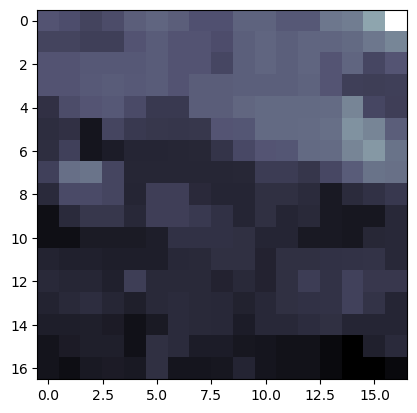

In [121]:
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [8]:
thresh = filters.threshold_li(ds.pixel_array)

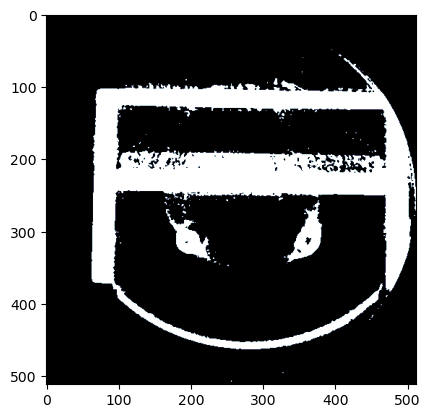

In [9]:
plt.imshow(ds.pixel_array > thresh, cmap=plt.cm.bone) 

In [10]:
def load_image_from_dir(filepath):
    
    # Get all the dicom files in the directory
    dicom_files = glob.glob(os.path.join(filepath, '*.dcm'))
    
    # Load dicom files
    dicom_images = [pydicom.dcmread(dicom_file) for dicom_file in dicom_files]
    
    # Sort files and images by InstanceNumber
    dicom_files = [dicom_file for _, dicom_file in sorted(zip([int(dicom_image.InstanceNumber) for dicom_image in dicom_images], dicom_files))]
    dicom_images = [dicom_image for _, dicom_image in sorted(zip([int(dicom_image.InstanceNumber) for dicom_image in dicom_images], dicom_images))]
    
    return dicom_files, dicom_images

In [11]:
dicom_files, dicom_images = load_image_from_dir('/Users/andrewl/Downloads/andrewl-20231204_092341/nscan1404a/3/DICOM')

In [12]:
thresh = filters.threshold_li(dicom_images[len(dicom_images)//2].pixel_array)

In [13]:
thresh  

-809.2097267221702

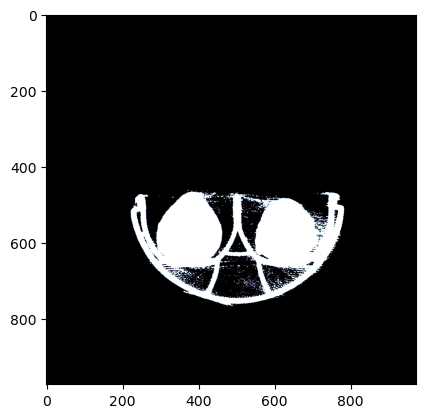

In [14]:
plt.imshow(dicom_images[len(dicom_images)//2].pixel_array > thresh, cmap=plt.cm.bone)

In [15]:
(blobs_labels,num) = measure.label(dicom_images[len(dicom_images)//2].pixel_array > thresh, return_num=True,background=0)

In [16]:
props=measure.regionprops(blobs_labels)

In [17]:
areas=[p.area for p in props]


In [18]:
areas

[5.0,
 2.0,
 1.0,
 83914.0,
 3.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 5.0,
 1.0,
 3.0,
 3.0,
 5.0,
 1.0,
 6.0,
 1.0,
 3.0,
 8.0,
 19.0,
 1.0,
 13.0,
 1.0,
 4.0,
 2.0,
 12.0,
 6.0,
 8.0,
 5.0,
 1.0,
 2.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 27.0,
 8.0,
 3.0,
 1.0,
 4.0,
 10.0,
 2.0,
 5.0,
 3.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 2.0,
 1.0,
 2.0,
 14.0,
 13.0,
 4.0,
 3.0,
 3.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 4.0,
 1.0,
 5.0,
 8.0,
 1.0,
 2.0,
 2.0,
 2.0,
 1.0,
 3.0,
 3.0,
 3.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 5.0,
 3.0,
 2.0,
 2.0,
 4.0,
 9.0,
 1.0,
 5.0,
 2.0,
 3.0,
 1.0,
 4.0,
 3.0,
 1.0,
 5.0,
 9.0,
 2.0,
 1.0,
 4.0,
 4.0,
 2.0,
 3.0,
 5.0,
 5.0,
 6.0,
 2.0,
 6.0,
 7.0,
 3.0,
 1.0,
 6.0,
 5.0,
 7.0,
 2.0,
 1.0,
 1.0,
 5.0,
 1.0,
 2.0,
 69.0,
 1.0,
 16.0,
 3.0,
 1.0,
 3.0,
 2.0,
 13.0,
 1.0,
 1.0,
 9.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 8.0,
 2.0,
 1.0,
 1.0,
 4.0,
 1.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

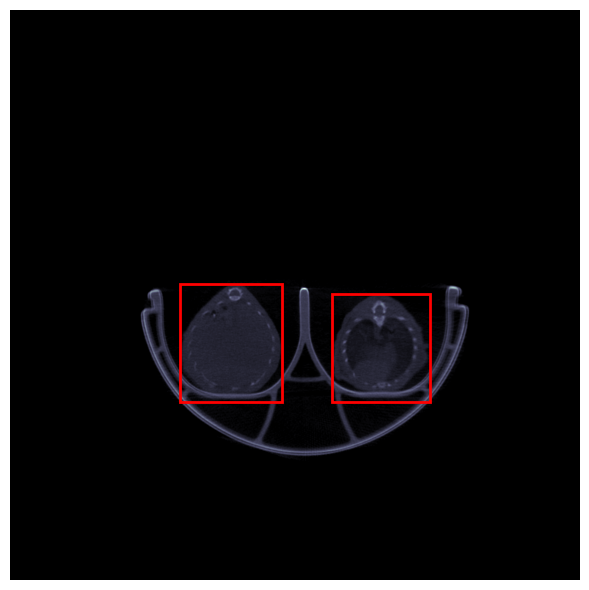

In [110]:
median_image = np.median([dicom_image.pixel_array for dicom_image in dicom_images], axis=0)
image = dicom_images[len(dicom_images)//2].pixel_array

thresh = filters.threshold_li(image)
blobs = image > thresh

(blobs_labels, num) = measure.label(dilated, return_num=True, background=0)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image, cmap=plt.cm.bone)

for region in regionprops(blobs_labels):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [41]:
thresh

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

In [22]:
median_image = np.median([dicom_image.pixel_array for dicom_image in dicom_images], axis=0)

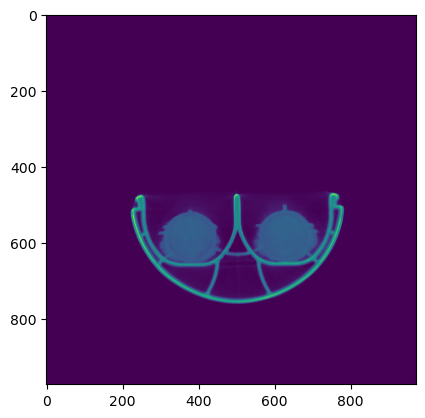

In [23]:
plt.imshow(median_image)

NameError: name 'plot_comparison' is not defined

In [45]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

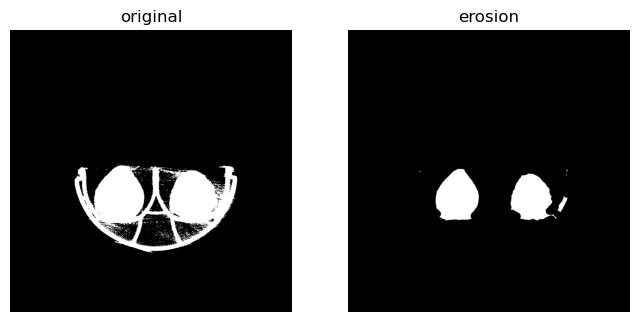

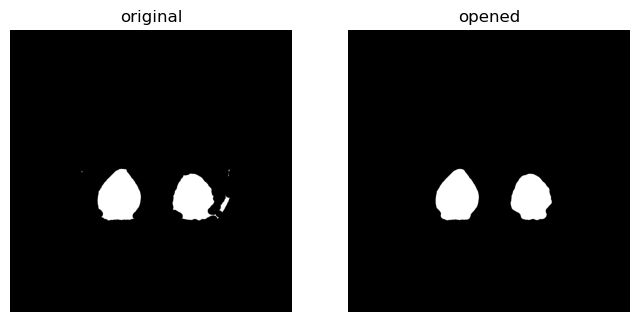

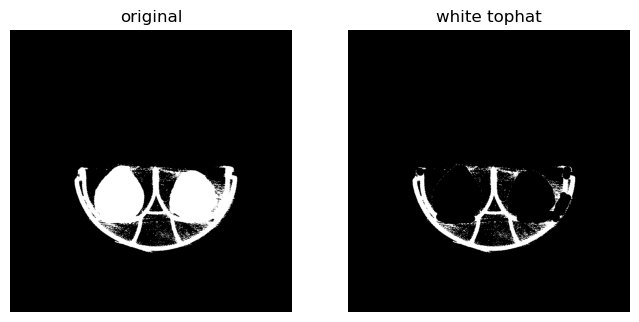

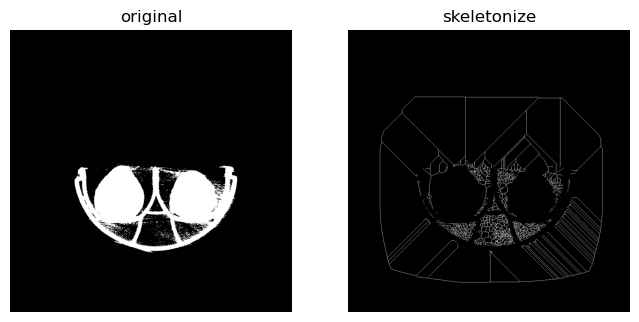

In [78]:
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image  # noqa
from skimage.morphology import disk  # noqa

footprint = disk(12)
eroded = erosion(blobs, footprint)
eroded2 = opening(eroded, footprint)
plot_comparison(blobs, eroded, 'erosion')
plot_comparison(eroded, eroded2, 'opened')
w_tophat = white_tophat(blobs, footprint)
plot_comparison(blobs, w_tophat, 'white tophat')
sk = skeletonize(blobs == 0)
plot_comparison(blobs, sk, 'skeletonize')

In [80]:
def multi_dil(im, num, footprint):
    for i in range(num):
        im = dilation(im, footprint)
    return im
def multi_ero(im, num, footprint):
    for i in range(num):
        im = erosion(im, footprint)
    return im

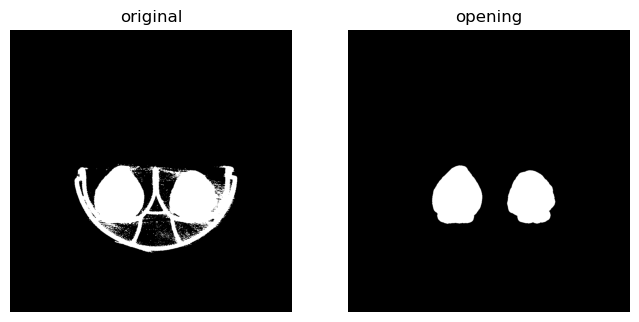

In [108]:
footprint = disk(10)
eroded = multi_ero(blobs, 2, footprint)
dilated = multi_dil(eroded, 2, footprint)
plot_comparison(blobs, dilated, 'opening')